In [543]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [544]:
data=pd.read_csv("happiness_score_dataset.csv")
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [545]:
data.shape

(158, 12)

We have 158 rows and 12 columns in our dataset

In [546]:
data.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [547]:
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

There is no null value present in the dataset

In [548]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


1. Mean and median are almost equal in Happiness Rank, Happiness Score, Economy, Health, Freedom, Dystopia Residual,
it means data is normally distributed in these columns.

2. Difference between Quartiles suggests there are outliers present in Standard Error, Family, Trust, Generosit and
Dystopia Residual

In [549]:
data.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

We can see that there is some skewness present in the columns Standard error, Family, Health, Trust and Generosity

In [550]:
#Label Encoding for Country and Region Column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Country'] = label_encoder.fit_transform(data['Country'])
data['Region'] = label_encoder.fit_transform(data['Region'])


In [551]:
datacor=data.corr()
datacor

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098538,0.083380,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778
Region,0.005092,1.000000,0.213773,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Rank,-0.098538,0.213773,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,0.083380,-0.176791,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.033879,-0.022600,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.037808,-0.260139,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.159416,-0.168533,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.037829,-0.357508,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.085684,0.092567,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.088155,0.165040,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105


<AxesSubplot:>

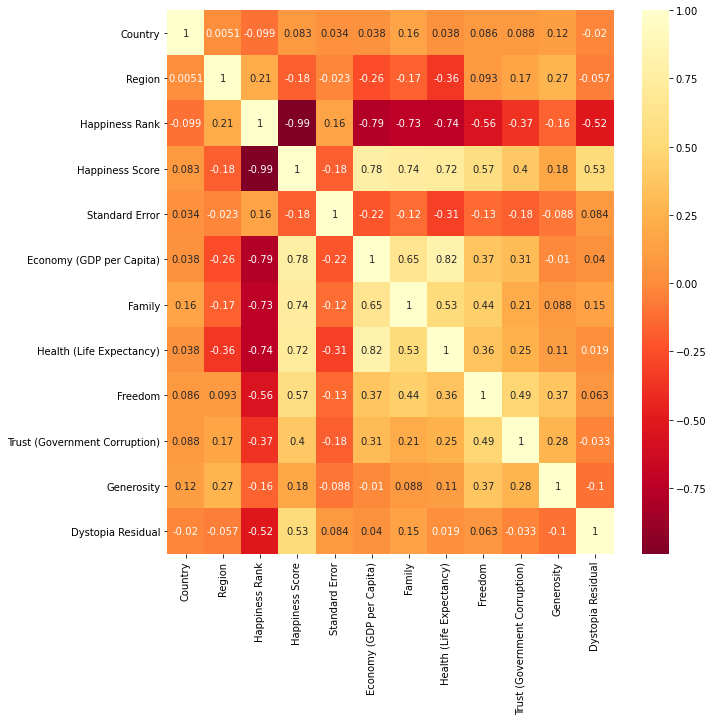

In [552]:
#Multivariate Analysis
plt.figure(figsize=(10,10))
sns.heatmap(datacor,cmap='YlOrRd_r',annot=True)

From the above correlation, it can be inferred that Generosity and Trust in Government has less impact to the individual happiness.GDP,Family and Health(Life Expectancy) in the country has most impact to the individual happiness.

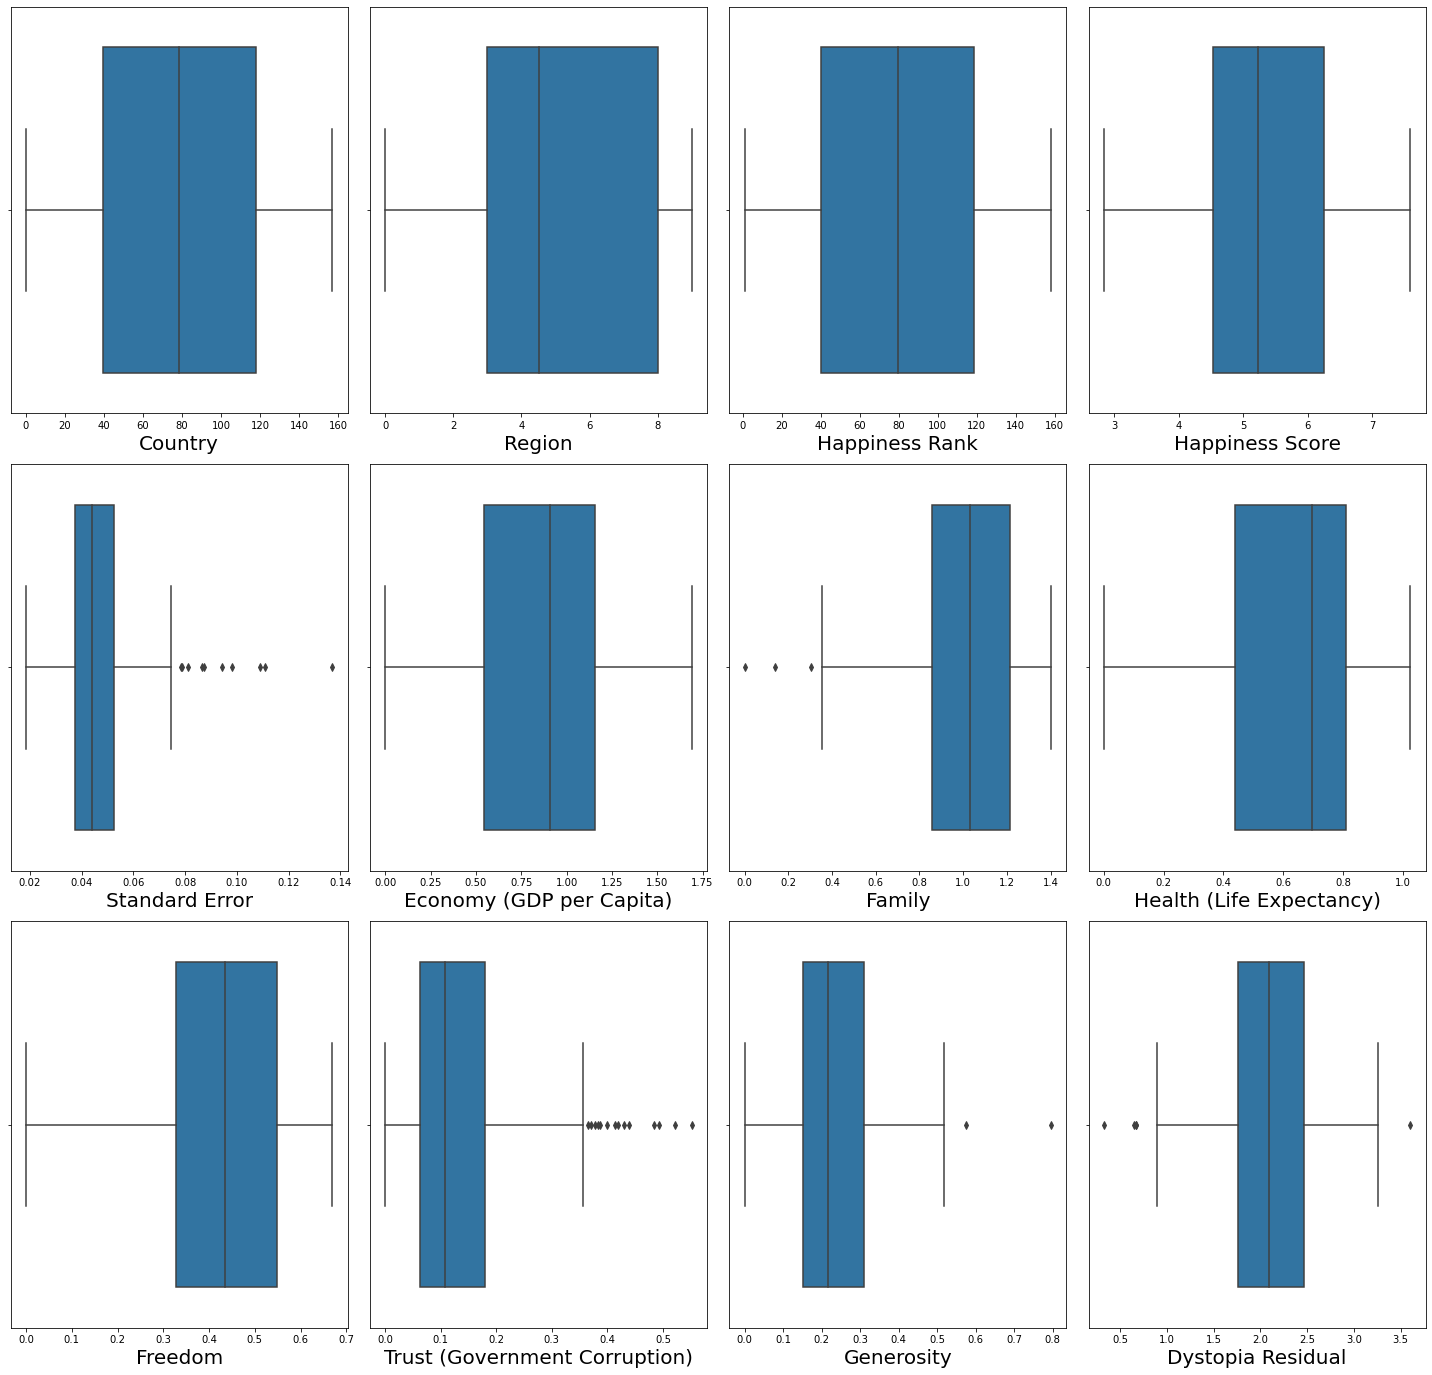

In [553]:
#Univariate Analysis
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=12:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()   

We can see outtliers are present in Standard error, family,trust,generosity and dystopia residual

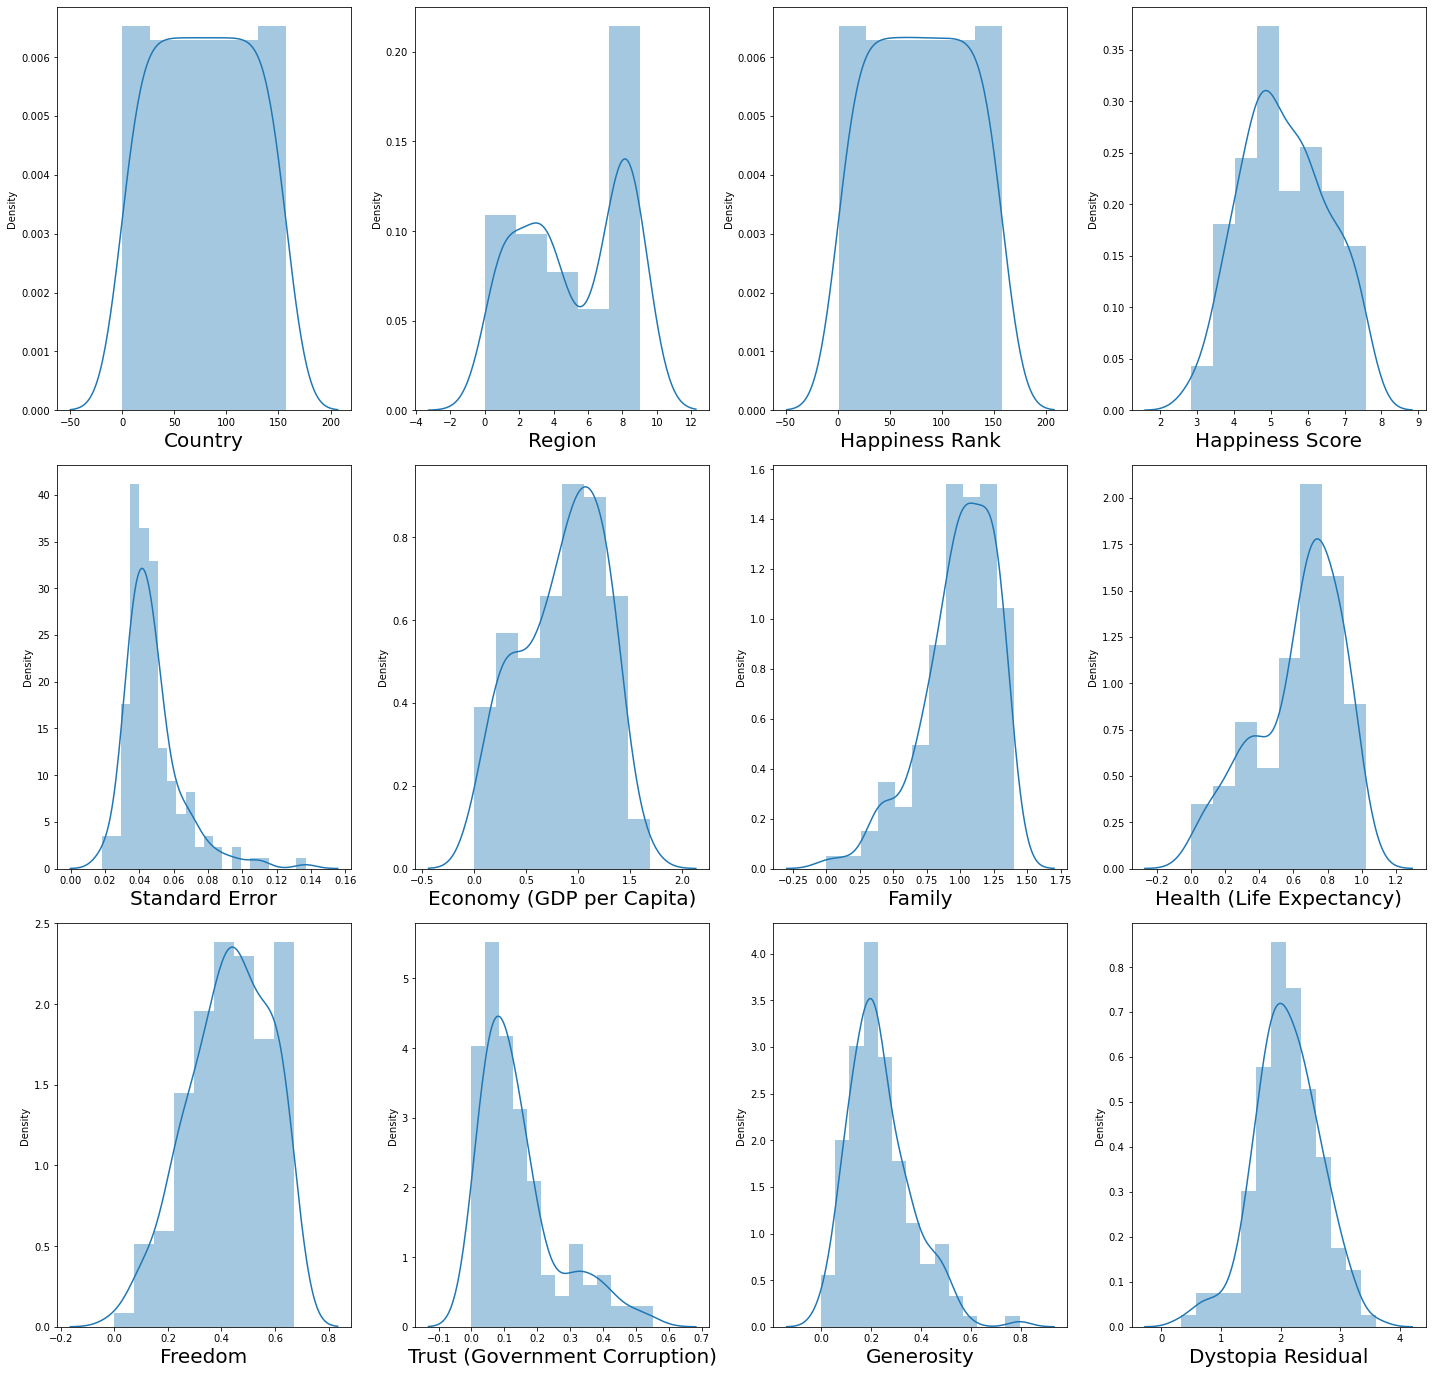

In [554]:
#Bivariate Analysis
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=12:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()    

Most of the data is normally distributed expect Trust, Generosity,Standard Error and Family

In [555]:
#Removing the outliers:
from scipy.stats import zscore
z=np.abs(zscore(data))
z

array([[1.23877001, 1.30025593, 1.72099989, ..., 2.30965159, 0.47103971,
        0.75825809],
       [0.44946522, 1.30025593, 1.69907456, ..., 0.01647953, 1.57585637,
        1.09285682],
       [0.90989302, 1.30025593, 1.67714922, ..., 2.8427738 , 0.8242928 ,
        0.71233526],
       ...,
       [1.26069514, 0.37544095, 1.67742676, ..., 0.38141902, 1.85689094,
        3.20843049],
       [1.26069514, 0.96511655, 1.69935209, ..., 0.35771452, 0.31694987,
        0.48198451],
       [1.37032081, 0.96511655, 1.72127743, ..., 0.30180313, 0.5581534 ,
        0.96361241]])

In [556]:
data=data[(z<3).all(axis=1)]

In [557]:
data.shape

(149, 12)

9 rows are deleted after removing the outliers

In [591]:
#removing the skewness using power_transform
from sklearn.preprocessing import power_transform
df=power_transform(data)
df=pd.DataFrame(df,columns=data.columns)

In [559]:
df.skew()

Country                         -0.267371
Region                          -0.222589
Happiness Rank                  -0.266578
Happiness Score                 -0.017940
Standard Error                  -0.031216
Economy (GDP per Capita)        -0.140644
Family                          -0.148528
Health (Life Expectancy)        -0.190663
Freedom                         -0.076489
Trust (Government Corruption)    0.174593
Generosity                       0.025172
Dystopia Residual                0.014748
dtype: float64

Skweness is now removed

In [560]:
#Splitting the data for training and testing the model:
x_=df.drop('Happiness Score',axis=1)
x_

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.190155,1.234514,-2.051514,-0.950337,1.492454,1.658880,1.469636,1.754982,1.817625,0.659579,0.755255
1,-0.300487,1.234514,-1.995844,0.378562,1.194067,2.009125,1.511292,1.442182,0.329676,1.562604,1.111168
2,-0.802057,1.234514,-1.945241,-1.041401,1.266612,1.730785,1.053469,1.616037,1.953400,0.977226,0.706495
3,0.652787,1.234514,-1.898098,-0.471124,1.695302,1.540248,1.117188,1.791023,1.664359,1.015018,0.655082
4,-1.157249,0.055028,-1.853543,-0.799032,1.269159,1.487718,1.242549,1.477337,1.541247,1.682150,0.629030
...,...,...,...,...,...,...,...,...,...,...,...
144,-0.124925,0.955280,1.496187,0.563000,-1.052662,-1.047195,-1.707662,0.204409,0.681035,-0.131736,-1.339678
145,-1.277525,0.955280,1.513754,-0.068119,-1.490349,-0.778550,-1.435893,-0.300343,0.188577,0.012019,-1.249871
146,-2.105378,0.666736,1.531289,-1.320810,-1.365216,-2.087389,-1.352388,-1.265395,-0.192843,1.134258,-0.327115
147,-1.507282,0.955280,1.566263,-0.692726,-1.433041,-2.010443,-1.309709,0.318123,-0.434498,-0.312080,-0.932164


In [561]:
y=df.iloc[:,3:4]
y

,Happiness Score
0,1.825912
1,1.806250
2,1.780485
3,1.776690
4,1.704342
...,...
144,-1.702017
145,-1.776732
146,-1.789987
147,-2.053906


In [562]:
#lets bring all features to a common scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x_)
x=pd.DataFrame(x,columns=x_.columns)
x

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.190155,1.234514,-2.051514,-0.950337,1.492454,1.658880,1.469636,1.754982,1.817625,0.659579,0.755255
1,-0.300487,1.234514,-1.995844,0.378562,1.194067,2.009125,1.511292,1.442182,0.329676,1.562604,1.111168
2,-0.802057,1.234514,-1.945241,-1.041401,1.266612,1.730785,1.053469,1.616037,1.953400,0.977226,0.706495
3,0.652787,1.234514,-1.898098,-0.471124,1.695302,1.540248,1.117188,1.791023,1.664359,1.015018,0.655082
4,-1.157249,0.055028,-1.853543,-0.799032,1.269159,1.487718,1.242549,1.477337,1.541247,1.682150,0.629030
...,...,...,...,...,...,...,...,...,...,...,...
144,-0.124925,0.955280,1.496187,0.563000,-1.052662,-1.047195,-1.707662,0.204409,0.681035,-0.131736,-1.339678
145,-1.277525,0.955280,1.513754,-0.068119,-1.490349,-0.778550,-1.435893,-0.300343,0.188577,0.012019,-1.249871
146,-2.105378,0.666736,1.531289,-1.320810,-1.365216,-2.087389,-1.352388,-1.265395,-0.192843,1.134258,-0.327115
147,-1.507282,0.955280,1.566263,-0.692726,-1.433041,-2.010443,-1.309709,0.318123,-0.434498,-0.312080,-0.932164


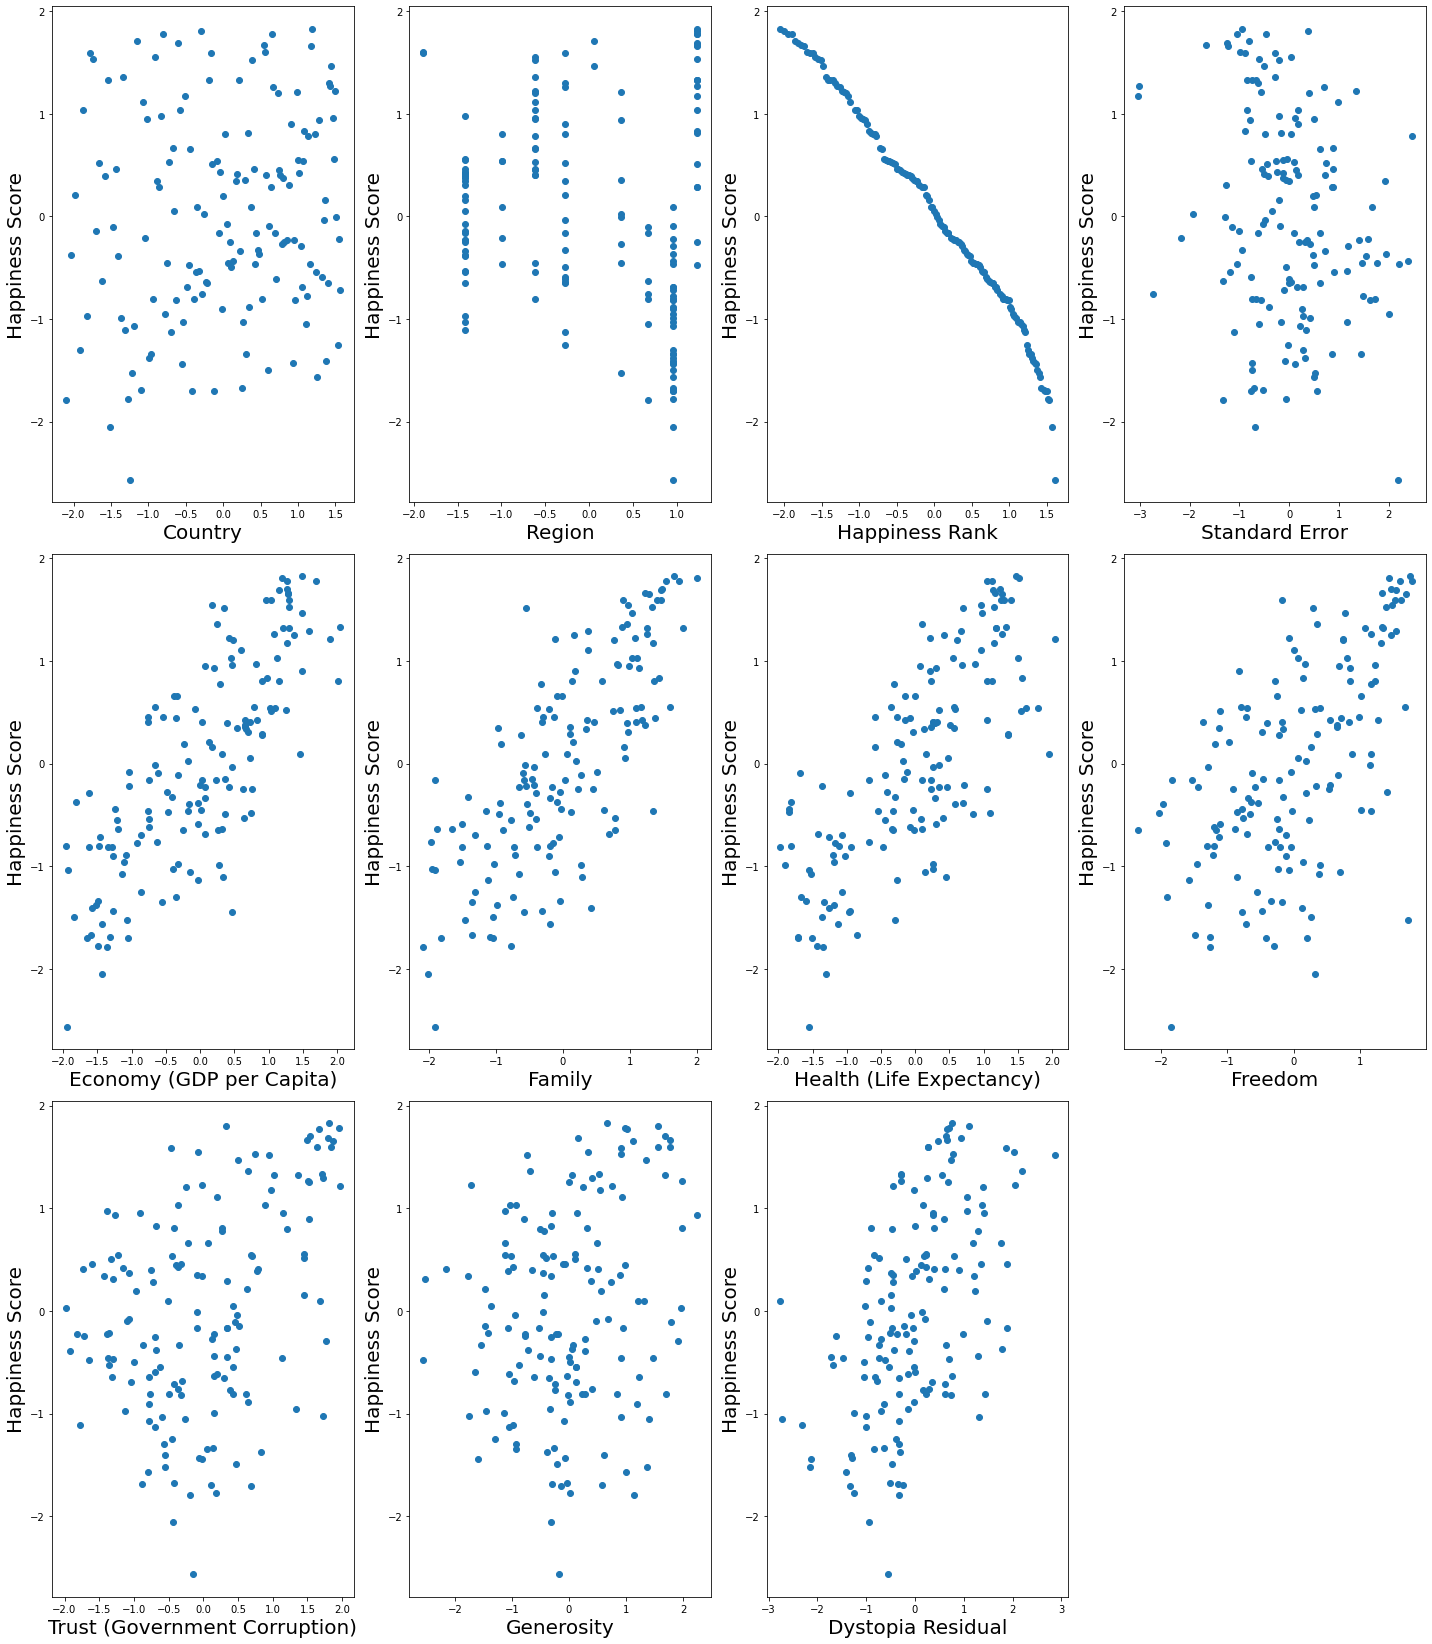

In [563]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1
for column in x:
    if plotnumber<=12:
        ax=plt.subplot(4,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Happiness Score',fontsize=20)
    plotnumber+=1
plt.tight_layout()   

There is lack of Trust and Generosity in most of the countries.

Economy, Family, Health and Freedom have most positive impact on happiness score.

In [564]:
x.shape

(149, 11)

In [565]:
y.shape

(149, 1)

In [592]:
#Splitting the data into training and testing datasets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=40)

In [567]:
lm=LinearRegression()

In [568]:
lm.fit(x_train,y_train)

LinearRegression()

In [569]:
lm.coef_

array([[ 0.02892506, -0.0520021 , -0.10572512,  0.00644462,  0.32665952,
         0.19245585,  0.19206842,  0.12229393,  0.04989603,  0.09422312,
         0.41434287]])

In [570]:
lm.intercept_

array([-0.00286006])

In [571]:
lm.score(x_train,y_train)

0.989146480123048

In [572]:
pred=lm.predict(x_test)
print("predicted result price: ", pred)
print("actual price: ",y_test)

predicted result price:  [[ 0.78054843]
 [ 0.10155802]
 [-0.77596952]
 [-0.88133724]
 [-0.34401334]
 [-1.33172435]
 [ 0.1162957 ]
 [-0.49199865]
 [-0.30332498]
 [ 1.00076396]
 [-0.34296826]
 [ 1.65330222]
 [ 0.59158138]
 [-1.10026075]
 [-0.16401298]
 [-1.50053534]
 [-0.99676424]
 [-1.04430035]
 [-0.26651564]
 [ 0.29258955]
 [-1.30744655]
 [-0.69576918]
 [ 0.40833044]
 [ 1.3400607 ]
 [ 0.00868018]
 [ 1.31252266]
 [ 1.54472133]
 [-0.91474568]
 [ 1.72127599]
 [-0.29180187]
 [ 0.23535995]
 [ 1.19478064]
 [ 1.1142239 ]
 [ 0.35408731]
 [ 1.7377878 ]
 [-1.08336048]
 [ 1.67958381]
 [ 0.65519382]
 [-0.83146649]
 [ 1.34452884]
 [ 1.88340106]
 [-0.36692505]
 [-1.14056269]
 [-0.54972252]
 [-0.86235537]]
actual price:       Happiness Score
38          0.779736
66          0.158205
115        -0.807182
117        -0.812119
89         -0.335885
135        -1.405347
68          0.092117
94         -0.450988
84         -0.247231
28          1.031424
90         -0.369702
11          1.549626
40         

In [573]:
print("error: ")
print("Mean absolute error: ",mean_absolute_error(y_test,pred))
print("Mean squared error: ",mean_squared_error(y_test,pred))
print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,pred)))

error: 
Mean absolute error:  0.05624394916977988
Mean squared error:  0.0057349893978938605
Root mean squared error:  0.0757297127810073


In [574]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.9941652263634926


In [575]:
from sklearn.svm import SVR as svr
from sklearn.tree import DecisionTreeRegressor as dt
from sklearn.neighbors import KNeighborsRegressor as knn
model=[DecisionTreeRegressor(),KNeighborsRegressor(),SVR()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print(m)
    print("error: ")
    print("Mean absolute error: ",mean_absolute_error(y_test,predm))
    print("Mean squared error: ",mean_squared_error(y_test,predm))
    print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score",r2_score(y_test,predm))
    print("\n\n")

DecisionTreeRegressor()
error: 
Mean absolute error:  0.06097750735391339
Mean squared error:  0.006131749438230048
Root mean squared error:  0.07830548791898335
r2_score 0.9937615630150959



KNeighborsRegressor()
error: 
Mean absolute error:  0.2864203589843553
Mean squared error:  0.12093657857275478
Root mean squared error:  0.34775936877783004
r2_score 0.8769592214756561



SVR()
error: 
Mean absolute error:  0.17047504494010923
Mean squared error:  0.052692146725363556
Root mean squared error:  0.2295477003268897
r2_score 0.9463910519735154





In [589]:
kf = KFold(n_splits = 5, shuffle = True)
model=[DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),LinearRegression()]
scores = []
for m in model:
    
    for i in range(5):
        result = next(kf.split(df), None)
        x_train = df.iloc[result[0]]
        x_test = df.iloc[result[1]]
        y_train = y.iloc[result[0]]
        y_test = y.iloc[result[1]]
        model = m.fit(x_train,y_train)
        predictions = m.predict(x_test)
        scores.append(model.score(x_test,y_test))
    print('Average K-Fold Score for :' ,m, np.mean(scores))

Average K-Fold Score for : DecisionTreeRegressor() 0.989368672778826
Average K-Fold Score for : KNeighborsRegressor() 0.9612369874313229
Average K-Fold Score for : SVR() 0.9505953590569642
Average K-Fold Score for : LinearRegression() 0.9629465192927231


In [593]:
#Since,DecisionTreeRegressor performed better than other model
import joblib
joblib.dump(dt,'dtfile.obj')


['dtfile.obj']